In [58]:
import pandas as pd
import numpy as np
import json

from bs4 import BeautifulSoup
import urllib.request as REQ
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import requests
import scipy.stats as stats
import datetime
plt.style.use('ggplot')
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
from sklearn.model_selection import GridSearchCV
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz  

# pd.set_option('display.max_rows', None)


In [59]:
df1 = pd.read_csv('전체카테고리_20211210.csv')
df2 = pd.read_csv('전체카테고리_20211211.csv')
df3 = pd.read_csv('전체카테고리_20211212.csv')



In [60]:
df = pd.concat([df1,df2,df3])


In [61]:
df

,수집일자,카테고리대분류,카테고리중분류,카테고리소분류,카테고리세분류,순위,상품명,상품아이디,판매자,판매자등급,...,배송정보,적립포인트,평점,검색키워드,태그,추가이미지개수,비디오유무,이미지url,이미지사이즈,이미지컬러코드
0,2021-12-10 17:10:54.575132,패션의류,남성의류,점퍼,NaN,1,국내매장판 내셔널지오그래픽 2021 FW 경량 패딩 점퍼 남성 여성 숏패딩 겨울 자켓,83477819660,스니커랩,M44003,...,v2!#!^^택배^^^^3000^6000^^^^^^^,^990^990^^^0^0,4.8,NaN,"간절기패딩,남자경량패딩,남자패딩,남자숏패딩,깔깔이",6,0,https://shopping-phinf.pstatic.net/main_834778...,1000x1000,7
1,2021-12-10 17:10:54.575132,패션의류,남성의류,점퍼,NaN,2,209 에센셜 람포지퍼 덕다운 푸퍼 숏 패딩 자켓 - 헤비다운 대장패딩 겨울 커플점퍼,83548281046,자바나스,M44002,...,v2!#!^^택배^^^^3000^6000^^^^^^^,^1097^1097^^^0^0,4.9,NaN,"남자숏패딩,겨울패딩,남성패딩,패딩점퍼",2,0,https://shopping-phinf.pstatic.net/main_835482...,840x840,8
2,2021-12-10 17:10:54.575132,패션의류,여성의류,바지,NaN,3,[무배] 엘로 부드러운 골지 코듀로이 융기모 밴딩 조거팬츠,83485513012,잇수다,M44003,...,v2!#!^^택배^^^^3000^6000^^^^^^^,^148^148^^^0^0,4.7,NaN,"융기모바지,여자기모바지",0,0,https://shopping-phinf.pstatic.net/main_834855...,2000x2500,33
3,2021-12-10 17:10:54.575132,패션의류,남성언더웨어/잠옷,시즌성내의,내복,4,BYC 남성 여성 발열 기모 내복 남자 여자 성인 내의 보온 겨울 타이즈 상의 하의 세트,81193080648,란제리아,M44002,...,v2!#!^^택배^^^^2500^5000^^^^^^^,^99^99^^^0^0,4.6,NaN,"남성내복,남성내의,발열내복,발열내의,히트텍,겨울내복,성인내복",1,0,https://shopping-phinf.pstatic.net/main_811930...,1000x1000,0
4,2021-12-10 17:10:54.575132,패션의류,남성의류,점퍼,NaN,5,국내매장판 내셔널지오그래픽 21FW 롱패딩 숏패딩 레이만 타루가 여성 남성 구스다운 점퍼,83542825647,국내정품,M44006,...,v2!#!^^택배^^^^3000^6000^^^^^^^,^2540^2540^^^0^0,4.9,NaN,"구스패딩,겨울점퍼,캐주얼점퍼,겨울아우터",5,0,https://shopping-phinf.pstatic.net/main_835428...,800x800,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4395,2021-12-12 17:01:34.547054,도서,유아,유아학습,영어/숫자 배우기,396,씨투엠 플라토 세트 S P A B C D E F 단계 수학독해 응용연산 도형 학습지,82204128881,봄봄북스,M44003,...,v2!#!^^택배^^^^2500^5000^^^^^^^,^216^216^^^0^0,4.8,NaN,"유아수학,유아학습지,초등학습지,연산,초등수학,도형학습,도형학습교구,초등수학문제집,초...",9,0,https://shopping-phinf.pstatic.net/main_822041...,1000x1000,32768
4396,2021-12-12 17:01:34.547054,도서,유아,유아학습,영어/숫자 배우기,397,국내 호리드 헨리 얼리리더 25권 세트 영어원서 Horrid Henry 음원제공,82535035202,JJ 브라더,M44003,...,v2!#!오늘출발^15:30^택배^^^^30000^60000^^1.3^^^^^,^215^215^^^0^0,4.8,NaN,"엄마표영어,초등영어,전집,세트,영어도서,영어단어",1,0,https://shopping-phinf.pstatic.net/main_825350...,876x904,8192
4397,2021-12-12 17:01:34.547054,도서,인문,인문일반,교양인문,398,(12월 12일 출간 예약판매) GAMERZ 게이머즈 2021년 12월호,83621442307,위즈북,M44004,...,v2!#!^^택배^^^^2500^5000^^^^^^^,^324^324^^^0^0,5.0,NaN,NaN,0,0,https://shopping-phinf.pstatic.net/main_836214...,397x467,0
4398,2021-12-12 17:01:34.547054,도서,유아,유아학습,한글/말 배우기,399,[선물] 똑똑한 유아 독해 어휘 1 2 3 단계 하루 초등 글쓰기 계산 도형 수학 ...,12714970304,아이북스,M44003,...,v2!#!^^택배^^^^2500^5000^^^^^^^,^151^151^^^0^0,4.7,NaN,NaN,0,0,https://shopping-phinf.pstatic.net/main_127149...,1000x1000,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 4399
Data columns (total 30 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   수집일자     13200 non-null  object 
 1   카테고리대분류  13200 non-null  object 
 2   카테고리중분류  13200 non-null  object 
 3   카테고리소분류  13187 non-null  object 
 4   카테고리세분류  6513 non-null   object 
 5   순위       13200 non-null  int64  
 6   상품명      13200 non-null  object 
 7   상품아이디    13200 non-null  int64  
 8   판매자      13200 non-null  object 
 9   판매자등급    13200 non-null  object 
 10  굿서비스     13200 non-null  bool   
 11  가격       13200 non-null  int64  
 12  등록일자     13200 non-null  int64  
 13  리뷰건수     13200 non-null  int64  
 14  리뷰건수합    13200 non-null  int64  
 15  구매건수     13200 non-null  int64  
 16  찜하기수     13167 non-null  float64
 17  쿠폰유무     13200 non-null  int64  
 18  이벤트유무    13200 non-null  int64  
 19  배송비      13200 non-null  int64  
 20  배송정보     13200 non-null  object 
 21  적립포인트    1320

In [63]:
df.isna().sum()

수집일자           0
카테고리대분류        0
카테고리중분류        0
카테고리소분류       13
카테고리세분류     6687
순위             0
상품명            0
상품아이디          0
판매자            0
판매자등급          0
굿서비스           0
가격             0
등록일자           0
리뷰건수           0
리뷰건수합          0
구매건수           0
찜하기수          33
쿠폰유무           0
이벤트유무          0
배송비            0
배송정보           0
적립포인트          0
평점           142
검색키워드      12980
태그          2817
추가이미지개수        0
비디오유무          0
이미지url         0
이미지사이즈         0
이미지컬러코드        0
dtype: int64

# 전처리`

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
def period(df):
    df['수집일자'] = df['수집일자'].str[:10].apply(lambda x: datetime.strptime(x,"%Y-%m-%d"))
    df['등록일자'] = df['등록일자'].astype('str').str[:8].apply(lambda x: datetime.strptime(x,"%Y%m%d")) 
    df['판매기간'] = (df['수집일자']-df['등록일자']).dt.days

    return df


# 전처리 함수 만들기
def dropcol(df) : # '등록일자', '리뷰건수', '찜하기수' 미포함
    df.drop(['수집일자','상품아이디', '카테고리세분류', '상품명', '판매자', '리뷰건수', '등록일자','이미지url','이미지사이즈','이미지컬러코드'], axis=1, inplace=True) 
    return df
def encodecol(df):
    df['판매자등급'] = df['판매자등급'].str.extract(pat = '([0-9]$)').astype(int)
    df['굿서비스'] = df['굿서비스'].astype(int)
    df['적립포인트'] = df['적립포인트'].str.extract(pat = '([0-9]+)').astype(int)
    df['배송정보'] = df['배송정보'].str.extract(pat = '([오]...)')
    df['배송정보'] = df['배송정보'].apply(lambda x: 1 if str(x) == '오늘출발' else 0)
    df['검색키워드'] = df['검색키워드'].notnull().astype(int); df
    df['태그'] = df['태그'].apply(lambda x : len(str(x).split(',')) if str(x) != 'nan' else 0)
    df['배송비'] = df['배송비'].apply(lambda x: 0 if x == 0 else 1)
    df['찜하기수'] = df['찜하기수'].fillna(0)
    df['평점'] = df['평점'].fillna(0)

    
    return df
def lecol(df):
    features = ['카테고리대분류', '카테고리중분류', '카테고리소분류']
    for f in features:
        le = LabelEncoder()
        le.fit(df.loc[:,f])
        df.loc[:,f] = le.transform(df.loc[:,f])
    return df

In [66]:
def preprocessing(df):
    df = period(df)
    df = dropcol(df)
    df = encodecol(df)
    df = lecol(df)

    return df

In [67]:
df = preprocessing(df)

In [68]:


# df.drop_duplicates(inplace=True); df.shape

In [69]:
df.isna().sum() # 변수별 결측치 확인

카테고리대분류    0
카테고리중분류    0
카테고리소분류    0
순위         0
판매자등급      0
굿서비스       0
가격         0
리뷰건수합      0
구매건수       0
찜하기수       0
쿠폰유무       0
이벤트유무      0
배송비        0
배송정보       0
적립포인트      0
평점         0
검색키워드      0
태그         0
추가이미지개수    0
비디오유무      0
dtype: int64

In [70]:
X = df.drop('리뷰건수합', axis = 1)
Y = df['리뷰건수합']

In [71]:
cols = X.columns
skewness = X[cols].apply(lambda x : x.skew()).sort_values(ascending=False)

sk_df = pd.DataFrame(skewness, columns=['skewness'])
sk_df['skw'] = abs(sk_df)
sk_df = sk_df.sort_values(by='skw', ascending=False).drop('skw', axis=1)

In [72]:
skw_feature = np.unique(sk_df[abs(sk_df.skewness)>0.5].index)
skw_feature #배송비 없음 

array(['가격', '검색키워드', '구매건수', '굿서비스', '배송정보', '비디오유무', '이벤트유무', '적립포인트',
       '찜하기수', '쿠폰유무', '판매자등급', '평점'], dtype=object)

In [73]:
# X[skw_feature] = np.log1p(X[skw_feature])

In [74]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 선형회귀 lm

In [76]:
# # linearRegression
# from sklearn.linear_model import LinearRegression

# lr_model = LinearRegression()
# lr_model.fit(x_train, y_train)
# y_pred = lr_model.predict(x_test)

# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# print(f'r2_score : {r2_score(y_test, y_pred)}')
# # print(mean_squared_error(y_test, y_pred))
# print(f'RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}')

- Ridge, Lasso, elasticNet 회귀 분석에서는 multicollinearity 다중공선성 문제와 over-fitting 과적합 문제 방지를 위해 아래와 같은 정규화 방식이 적용되었습니다.
- Ridge 회귀 모델은  L2 정규화
- Lasso 회귀모델은 L1 정규화
- elasticNet은 Ridge의 L2와 Lasso의 L1 정규화 혼합

# Ridge

In [77]:

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,learning_curve, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

from sklearn.linear_model import LassoCV,ElasticNetCV,Lasso,ElasticNet
from sklearn.kernel_ridge import KernelRidge


# 아래 추가적인 패키지가 설치가 되어 있어야 함!!!!!!!
from xgboost import XGBRegressor
from mlxtend.regressor import StackingRegressor

# 시간
import time

In [78]:
kfold_num = 6

kfold = KFold(n_splits = kfold_num,shuffle = True, random_state = 0)

In [79]:
# V패키지 버전에 따라 정확하게 1:! 안되고 ㄱ부호 등 수정을 해야할 수 있음
# 지금 사용하는 패키지를 보고, 

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, x_train, y_train, cv=kfold, scoring="neg_mean_squared_error"))
    return rmse



In [80]:
kr_model = KernelRidge()
score = rmse_cv(kr_model)
print(score.mean())
print(score.std())

15009.341515530206
4323.145703072325


In [96]:
# KernelRidge(alpha=0.005, coef0=1.6, degree=2, kernel='polynomial')
# alpha=0.005, coef0=1.6, degree=2, kernel='polynomial')
# KernelRidge -> RandomGridsearch
kr_model = KernelRidge()

t1 = time.time()
parameters = {
    "alpha" : [ 0.004, 0.005, 0.003,0.015],
    "kernel" : ["rbf","polynomial"],
    "degree" : [1.5,2,2.1,2.2,2.5],
    "coef0" : [1.5, 1.6, 1.65,1.7]
}
# RGS 
kr_rgs_model = RandomizedSearchCV(
    kr_model, 
    param_distributions=parameters,
    cv = kfold,
    scoring = "neg_root_mean_squared_error", 
    n_jobs=-1,
    verbose=2
)
kr_rgs_model_result = kr_rgs_model.fit(x_train, y_train)
t2 = time.time()
print("Process Time", str(t2-t1))


Fitting 6 folds for each of 10 candidates, totalling 60 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Process Time 4477.657893419266


In [97]:
kr_r2score = r2_score(y_test, kr_rgs_model.predict(x_test)) # 결정계수 R^2 score
kr_rmse = mean_squared_error(y_test, kr_rgs_model.predict(x_test), squared=False) # RMSE
print(f'R2 score : {kr_r2score}, RMSE : {kr_rmse}')
print(f'Best Score : {kr_rgs_model.best_score_}')
print(f'Best Estimator : {kr_rgs_model.best_estimator_}')
print("훈련 세트의 정확도 : {:.2f}".format(kr_rgs_model.score(x_train,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(kr_rgs_model.score(x_test,y_test)))


R2 score : 0.6876512885978894, RMSE : 11812.65097054403
Best Score : -15218.771865208291
Best Estimator : KernelRidge(alpha=0.003, coef0=1.7, degree=2, kernel='polynomial')
훈련 세트의 정확도 : -12516.42
테스트 세트의 정확도 : -11812.65


- Ridge 파라미터 튜닝

In [ ]:
# 학습곡선 : 데이터셋의 샘플링에 따른 모델의 성능변화 그래프
# import mglearn

# from sklearn.model_selection import train_test_split



# X, y = mglearn.datasets.load_extended_boston()

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



# mglearn.plots.plot_ridge_n_samples()


# Lasso

In [16]:
# # Lasso Regression
# from sklearn.linear_model import Lasso


# ls_model = Lasso()
# ls_model.fit(x_train, y_train)
# y_pred = ls_model.predict(x_test)
# print(f'r2_score : {r2_score(y_test, y_pred)}')
# # print(mean_squared_error(y_test, y_pred))
# print(f'RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}')


r2_score : 0.5529577964191161
RMSE : 14131.939688439797


# Elastic Net

In [21]:
# ElasticNet Regression
from sklearn.linear_model import ElasticNet

en_model = ElasticNet()
en_model.fit(x_train, y_train)
y_pred = en_model.predict(x_test)
print(f'r2_score : {r2_score(y_test, y_pred)}')
# print(mean_squared_error(y_test, y_pred))
print(f'RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}')


r2_score : 0.550634732215431
RMSE : 14168.610570676055


In [94]:
# 1. ElasticNet(alpha=0.01, l1_ratio=0.0001, random_state=1234, tol=1e-05)

# elastic -> RandomGridsearch
elnet_model = ElasticNet(random_state=1234, normalize=False)

t1 = time.time()
parameters = {
    # Lasso에서 어느 정도 규약을 지정할지에 대한 부분..
    "alpha" : [0.02,0.05,0.04,0.07],
    "l1_ratio" : [0.00005,0.000001,0.0001,0.0002], 
    
    # 실제 구현상으로 수치 연산 과정에서 필요한 설정
    "tol" : [0.000003,0.000001, 0.00005], 
    "max_iter" : [2000,3000]
}
# RGS
n_iter_search = 20
elnet_rgs_model = RandomizedSearchCV(
    elnet_model, 
    param_distributions=parameters,
    n_iter=n_iter_search,
    cv = kfold,
    scoring = "neg_root_mean_squared_error", 
    random_state=1234,
    n_jobs=-1,
    verbose=2
)
elnet_rgs_model.fit(x_train, y_train)
t2 = time.time()
print("Process Time", str(t2-t1))

Fitting 6 folds for each of 20 candidates, totalling 120 fits
Process Time 3.852442741394043


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 280564757954.96985, tolerance: 11712726.501211122
  model = cd_fast.enet_coordinate_descent(


In [95]:
kr_r2score = r2_score(y_test, elnet_rgs_model.predict(x_test)) # 결정계수 R^2 score
kr_rmse = mean_squared_error(y_test, elnet_rgs_model.predict(x_test), squared=False) # RMSE
print(f'R2 score : {kr_r2score}, RMSE : {kr_rmse}')
print(f'Best Score : {elnet_rgs_model.best_score_}')
print(f'Best Estimator : {elnet_rgs_model.best_estimator_}')
print("훈련 세트의 정확도 : {:.2f}".format(elnet_rgs_model.score(x_train,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(elnet_rgs_model.score(x_test,y_test)))


R2 score : 0.5522873681786289, RMSE : 14142.53253833359
Best Score : -15001.376375874825
Best Estimator : ElasticNet(alpha=0.07, l1_ratio=1e-06, max_iter=2000, random_state=1234,
           tol=3e-06)
훈련 세트의 정확도 : -14604.33
테스트 세트의 정확도 : -14142.53


# SVM

In [22]:
# # Support Vector machine
# from sklearn.svm import SVR

# svm_model = SVR()
# svm_model.fit(x_train, y_train)
# y_pred = svm_model.predict(x_test)
# print(f'r2_score : {r2_score(y_test, y_pred)}')
# # print(mean_squared_error(y_test, y_pred))
# print(f'RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}')


# 랜덤포레스트

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(f'r2_score : {r2_score(y_test, y_pred)}')
# print(mean_squared_error(y_test, y_pred))
print(f'RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}')

r2_score : 0.9437621857733157
RMSE : 5012.353924267696


In [ ]:
# max_depth=20, max_leaf_nodes=2, min_samples_split=10,
                      # n_estimators=300, n_jobs=-1, random_state=1234)
rf_model = RandomForestRegressor(random_state=1234, n_jobs=-1)

t1 = time.time()
parameters = {
    "n_estimators" : [200, 300, 400],
    "criterion":["mse","mae","squared_error"],
    "max_depth":[20,25,300],
    "min_samples_split" : [5,10,13],
    "max_features" : ["auto","sqrt","log2"]
}

# RGS
n_iter_search = 20
rf_rgs_model = RandomizedSearchCV(
    rf_model, 
    param_distributions=parameters,
    n_iter=n_iter_search,
    cv = kfold,
    scoring = "neg_root_mean_squared_error", 
    random_state=1234,
    n_jobs=-1,
    verbose=2
)
rf_rgs_model.fit(x_train, y_train)
t2 = time.time()
print("Process Time", str(t2-t1))


Fitting 6 folds for each of 20 candidates, totalling 120 fits


In [ ]:
rf_r2score = r2_score(y_test, rf_rgs_model.predict(x_test)) # 결정계수 R^2 score
rf_rmse = mean_squared_error(y_test, rf_rgs_model.predict(x_test), squared=False) # RMSE
print(f'R2 score : {kr_r2score}, RMSE : {kr_rmse}')
print(f'Best Score : {rf_rgs_model.best_score_}')
print(f'Best Estimator : {rf_rgs_model.best_estimator_}')
print("훈련 세트의 정확도 : {:.2f}".format(rf_rgs_model.score(x_train,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(rf_rgs_model.score(x_test,y_test)))


# [y_test df 만들기] 

In [26]:
 
y_test = pd.DataFrame(y_test)
y_test.reset_index(inplace=True)
y_test = y_test[['리뷰건수합']]

# [df 합치기]
y_pred_rf = rf_model.predict(x_test)
y_pred_rf = pd.DataFrame(y_pred_rf, columns=['예측값'])
result_rf = pd.concat([y_test, y_pred_rf], axis=1); result_rf

,리뷰건수합,예측값
0,612,831.470000
1,5,9.980000
2,42,96.063333
3,757,1008.810000
4,1226,1691.720000
...,...,...
3955,3124,3154.040000
3956,19,22.310000
3957,249,284.950000
3958,461,572.650000


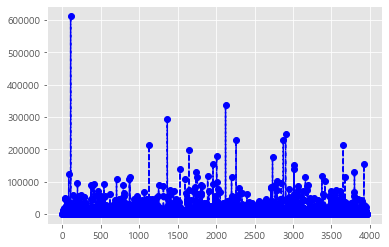

In [27]:
plt.plot(y_test,data=result_rf,color = 'b', linestyle = '--', marker='o')

In [28]:
plt.style.use('ggplot')

In [29]:

# plt.figure(figsize=(100,100))
# plt.plot(y_test,data=result_rf,color = 'b', linestyle = '--')
# plt.plot(y_pred_rf,data=result_rf,color = 'r', linestyle = '-')
# plt.show()

# XGBoost

In [30]:
# # 중복값제거안한거
# # XGBoost
# from xgboost import XGBRegressor

# xg_model = XGBRegressor()
# xg_model.fit(x_train, y_train)
# y_pred = xg_model.predict(x_test)
# print(f'r2_score : {r2_score(y_test, y_pred)}')
# # print(mean_squared_error(y_test, y_pred))
# print(f'RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}')


# LGBM

In [31]:
# lightGBM
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor()
lgbm_model.fit(x_train, y_train)
y_pred = lgbm_model.predict(x_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(f'r2_score : {r2_score(y_test, y_pred)}')
# print(mean_squared_error(y_test, y_pred))
print(f'RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}')

r2_score : 0.8789266526659589
RMSE : 7354.476888134196


#  DT

In [215]:
# # dt 
# from sklearn.tree import DecisionTreeRegressor

# dt_model = DecisionTreeRegressor()
# dt_model.fit(x_train, y_train)
# y_pred = dt_model.predict(x_test)

# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# print(f'r2_score : {r2_score(y_test, y_pred)}')
# # print(mean_squared_error(y_test, y_pred))
# print(f'RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}')

r2_score : 0.9347750838112573
RMSE : 5398.017368264093


# KNN

In [34]:
# knn 
from sklearn.neighbors import KNeighborsRegressor


knn_model = KNeighborsRegressor()
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(f'r2_score : {r2_score(y_test, y_pred)}')
# print(mean_squared_error(y_test, y_pred))
print(f'RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}')

r2_score : 0.728359664165119
RMSE : 11016.018131825449
